<a href="https://colab.research.google.com/github/uss111kr/Linear-Regression/blob/main/Uma_Shankar_Singh_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regression is a statistical method of predicting a numerical value (the target) based on other data points (the features).

A Linear Regression model assumes there is a straight-line relationship between these values. For example, if $y$ is the target we want to predict and $x$ is our feature, we use the equation of a line: $$y = wx + b$$

In this formula, $w$ represents the weight (how much the feature affects the result) and $b$ represents the bias or intercept.

In machine learning, these are called the 'parameters' that the model learns to find the best possible fit for our data.

| Math (y=mx+c) | ML  (y=wx+b) |
|:--------------|:-------------|
|Slope (m)|Weight (w)|
|y-intercept (c)|Bias (b)|
|Independent variable (x)|Feature (x)|
|Dependent variable (y)|target / Target (y)|

[Linear Regression Illustration](https://www.desmos.com/calculator/5x3znqejt4)

### Scikit Learn

Scikit learn ( `sklearn`) is used for machine learning tasks like:
1. Supervised Learning:
  - Linear Regression
  - Logistic Regression (Binary Classifier)
  - Decision Trees (Multiclass Classifier)
2. Unsupervised Learning:
  - K-Means Clustering


In [ ]:
!pip install scikit-learn

### Predicting 28-days Strength of Concrete

[Compressive Strength of Concrete](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength) dataset is used from the (https://colab.research.google.com/drive/13sJOoQiU4TeLfNaEXMXHbimO4YNGFSsA) and a linear regression model is developed to predict 28-days strength of concrete based on the concentration of various ingredients.

1. Data Preprocessing: Rename the columns and filter the rows with `age == 28`
2. Model Selection: Since a numerical (continuous) target (`compressive_strength`) is needed to predict against numerical features, simple linear regression is used.
3. Training & Evaluation: "train-test split" is done and "train set" is used to train the model. Then,the "test set" is used to calculate goodness of fit (R Square) and the residuals (sum of errors in each prediction).

### Data Preprocessing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # heatmap

# reading the data
xls_path = '/content/drive/MyDrive/Python/Concrete_Data.xls'
concrete_df = pd.read_excel(xls_path)

# display(concrete_df.columns)

# renaming columns
concrete_df.rename(columns = {
  'Cement (component 1)(kg in a m^3 mixture)': 'cement',
  'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'blast_furnace_slag',
  'Fly Ash (component 3)(kg in a m^3 mixture)': 'fly_ash',
  'Water  (component 4)(kg in a m^3 mixture)': 'water',
  'Superplasticizer (component 5)(kg in a m^3 mixture)': 'superplasticizer',
  'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'coarse_aggregate',
  'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'fine_aggregate',
  'Age (day)': 'age',
  'Concrete compressive strength(MPa, megapascals) ': 'compressive_strength'
}, inplace = True)

# filtering by age == 28
concrete_df = concrete_df.query('age == 28')
# equivalent to concrete_df[concrete_df['age'] == 28]

# remove the age column
concrete_df.drop(columns = ['age'], inplace = True)

# preview the data frame
display(concrete_df.head(10))

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,61.887366
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,39.289790
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.021684
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,47.813782
21,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,28.237490
28,427.5,47.5,0.0,228.0,0.0,932.0,594.0,37.427515
36,237.5,237.5,0.0,228.0,0.0,932.0,594.0,30.079769


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Correlation Analysis

In [ ]:
# calculating correlation matrix (pearson correlation coefficient)

correlation_matrix = concrete_df.corr(method = "pearson")

display(correlation_matrix)


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,compressive_strength
cement,1.000000,-0.384743,-0.398613,-0.190272,-0.046934,0.020778,-0.124040,0.666058
blast_furnace_slag,-0.384743,1.000000,-0.251259,0.123474,0.024699,-0.249908,-0.262033,0.141404
fly_ash,-0.398613,-0.251259,1.000000,-0.025742,0.462265,-0.255168,-0.051904,-0.269446
water,-0.190272,0.123474,-0.025742,1.000000,-0.443441,-0.272437,-0.367800,-0.398556
superplasticizer,-0.046934,0.024699,0.462265,-0.443441,1.000000,-0.330106,0.094681,0.213257
coarse_aggregate,0.020778,-0.249908,-0.255168,-0.272437,-0.330106,1.000000,-0.179138,-0.120295
fine_aggregate,-0.124040,-0.262033,-0.051904,-0.367800,0.094681,-0.179138,1.000000,-0.138026
compressive_strength,0.666058,0.141404,-0.269446,-0.398556,0.213257,-0.120295,-0.138026,1.000000


### Features & Target

In [ ]:
column_names = concrete_df.columns

target = 'compressive_strength'
features = column_names[column_names != target]

# y = wX + b
X = concrete_df[features] # feature vectors
y = concrete_df[target] # target

### Train-Test Split

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

# 20% of the data to be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

display(X_test)
display(y_test)

print(f"Training Set: {len(y_train)}/{len(concrete_df)}")
print(f"Testing Set: {len(y_test)}/{len(concrete_df)}")

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate
888,153.0,145.0,0.0,178.0,8.0,1000.0,822.0
951,152.7,144.7,0.0,178.1,8.0,999.7,822.2
1010,317.9,0.0,126.5,209.7,5.7,860.5,736.6
818,525.0,0.0,0.0,189.0,0.0,1125.0,613.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
...,...,...,...,...,...,...,...
995,158.6,148.9,116.0,175.1,15.0,953.3,719.7
997,310.0,142.8,0.0,167.9,10.0,914.3,804.0
21,139.6,209.4,0.0,192.0,0.0,1047.0,806.9
745,281.0,0.0,0.0,185.0,0.0,1104.0,774.0


,compressive_strength
888,19.008853
951,19.009543
1010,40.062003
818,55.944083
1,61.887366
...,...
995,27.681082
997,45.304778
21,28.237490
745,22.435549


Training Set: 340/425
Testing Set: 85/425


### Training the Model

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

from sklearn.linear_model import LinearRegression

# Given the values of X and y, solve for w and b
regressor = LinearRegression().fit(X_train, y_train)

weights = regressor.coef_
intercept = regressor.intercept_

print(f'Weights: {weights}')
print(f'Intercept: {intercept}')

Weights: [ 0.16673835  0.14206053  0.09836764 -0.03724061  0.16249398  0.04290699
  0.05169428]
Intercept: -100.87246892633117


### Testing the Model (R Square)

In [ ]:
score = regressor.score(X_test , y_test)

print(f'Coefficient of Determination (R Squared) = {score:.3f}')

Coefficient of Determination (R Squared) = 0.798


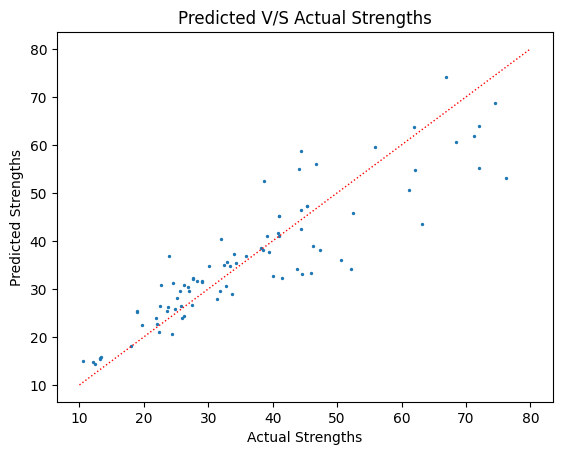

In [ ]:
# scatter plot of predicted vs actual values
# X_test has multiple feature vectors
# predicted_strengths will have "compressive strengths" for ALL features in "X_test"
predicted_strengths = regressor.predict(X_test)

plt.scatter(
  x = y_test, # actual strenghts
  y = predicted_strengths, # predicted strengths
  s = 2,
  marker = 'o'
)

# line for y = x (best case) for all values
plt.plot(
  [10, 80],
  [10, 80],
  color = 'red',
  linestyle = 'dotted',
  linewidth = 1
)

plt.xlabel("Actual Strengths")
plt.ylabel("Predicted Strengths")

plt.title("Predicted V/S Actual Strengths")

plt.show()

### Residuals

MSE = 51.20463103820259


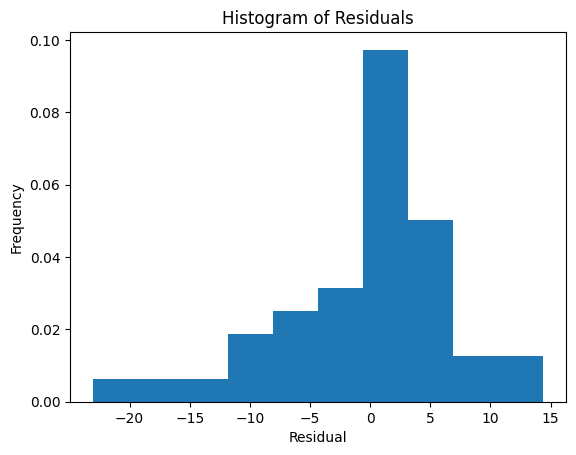

In [ ]:
# residual = y_predicted - y_actual
residuals = predicted_strengths - y_test

# MSE (mean square error)
mse = (residuals**2).mean()

print(f'MSE = {mse}')

# histogram of residuals
plt.hist(residuals, density = True)

plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.title('Histogram of Residuals')

plt.show()

In [ ]:
# using metrics from sklearn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

cod = r2_score(y_test, predicted_strengths)
mae = mean_absolute_error(y_test, predicted_strengths)
mse = mean_squared_error(y_test, predicted_strengths)

print(f'COD: {cod:.2f}, MAE: {mae:.2f}, MSE: {mse:.2f}')


COD: 0.80, MAE: 5.31, MSE: 51.20



Note that the linear regression model can be represented by mathematical equation:

$$y = b + w_0 \cdot x_0 + w_1 \cdot x_1 + ...$$



In the code cell that follows, strength for a random data is calculated manually (using the equation), and then compared with the model predicted value. Complete the code and verify that the `predict` method calculates the target using the same mathematical equation.

In [ ]:
# making a prediction
# data frame with a single row
some_random_data = pd.DataFrame([{
  'cement': 400, # x0
  'blast_furnace_slag': 100, #x1
  'fly_ash': 25, # x2
  'water': 200, #x3
  'superplasticizer': 0,
  'coarse_aggregate': 850,
  'fine_aggregate': 600
}])

# y = b + w0 * x0 + w1 * x1 + ...
calculated_strength = intercept # y = b (need to add w * x for all x's)

# features is a list of column names selected as features
for i in range(len(features)):
  column_name = features[i] # TODO: update the column_name from features list

  # some_random_data is a data frame with 1 row
  x = some_random_data.loc[0,features[i]]
  w = weights[i]


  calculated_strength = calculated_strength + w*x

# predict returns an array (list), even for a single prediction
predicted_strength = regressor.predict(some_random_data)[0]

# calculated and predicted strengths should be same
print(f'Calculated: {calculated_strength}\nPredicted: {predicted_strength}')

Calculated: 42.52750159659391
Predicted: 42.52750159659392
